# Morphology (Example)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

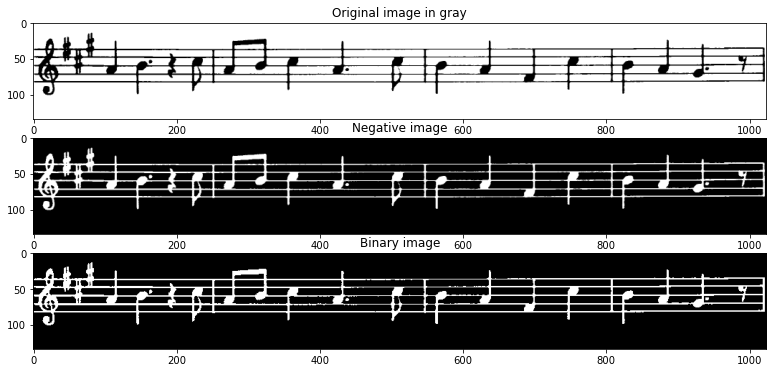

In [2]:

gray_image = cv2.imread("images/notes.png", 0)
negative_image = cv2.bitwise_not(gray_image)
binary_image = cv2.adaptiveThreshold(negative_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)

plt.figure(figsize=[17,6])
plt.subplot(311);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray");
plt.subplot(312);plt.imshow(negative_image, cmap='gray');plt.title("Negative image");
plt.subplot(313);plt.imshow(binary_image, cmap='gray');plt.title("Binary image");

## Structure elements for horizontal lines

In [4]:
cols = binary_image.shape[1]
horizontal_size = cols // 30
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
print(horizontalStructure)


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


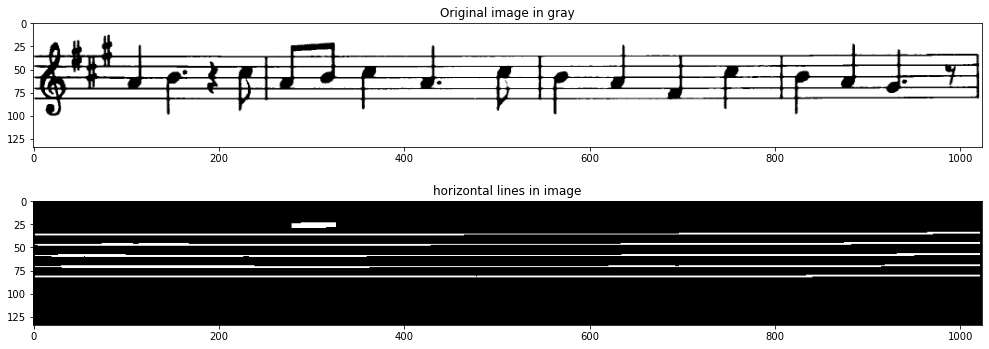

In [5]:
horizontal = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, horizontalStructure)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray");
plt.subplot(212);plt.imshow(horizontal, cmap='gray');plt.title("horizontal lines in image");

### Structure elements for vertical lines

In [6]:
rows = gray_image.shape[0]
verticalsize = rows // 30

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
print(verticalStructure)

[[1]
 [1]
 [1]
 [1]]


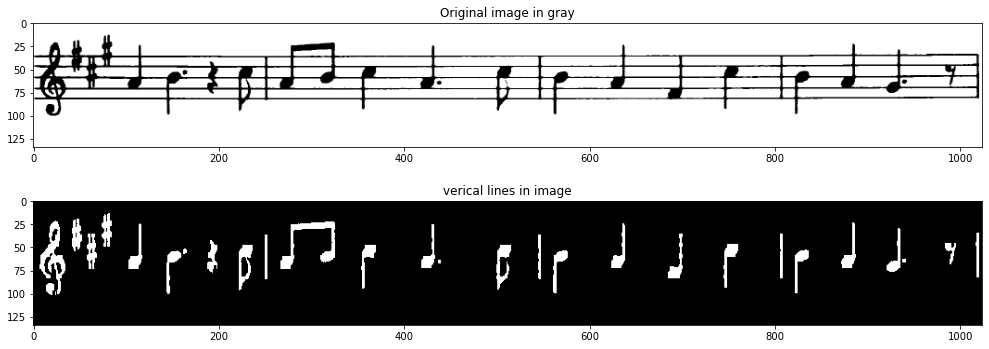

In [7]:
vertical = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, verticalStructure)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray");
plt.subplot(212);plt.imshow(vertical, cmap='gray');plt.title("verical lines in image");

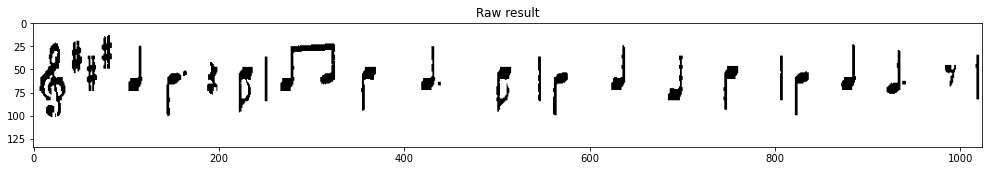

In [8]:
raw_result = cv2.bitwise_not(vertical)

plt.figure(figsize=[17,6])
plt.imshow(raw_result, cmap='gray');plt.title("Raw result");

### extra

#### Edge

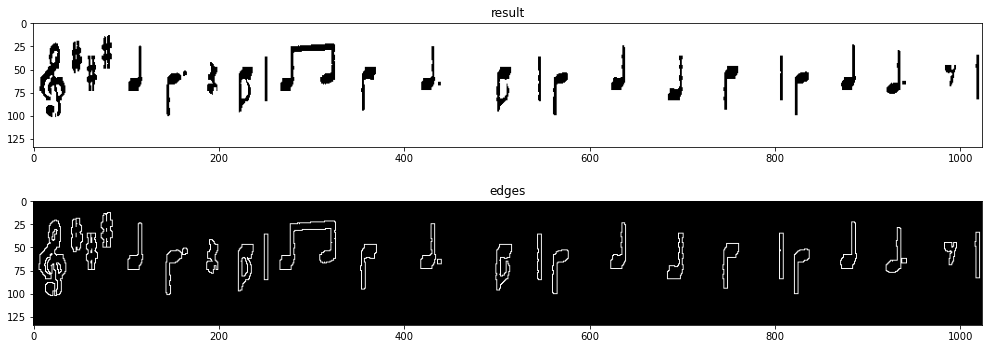

In [9]:
edges = cv2.adaptiveThreshold(raw_result, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(raw_result, cmap='gray');plt.title("result");
plt.subplot(212);plt.imshow(edges, cmap='gray');plt.title("edges");

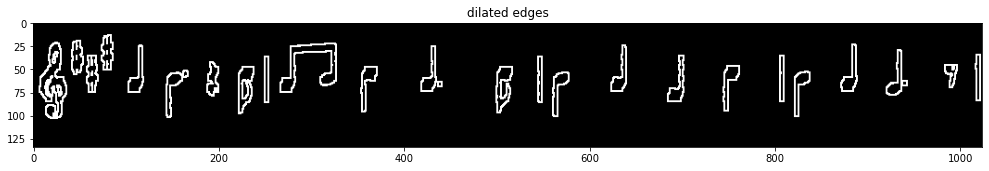

In [10]:
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)

plt.figure(figsize=[17,6])
plt.imshow(edges, cmap='gray');plt.title("dilated edges");

##### Smooth

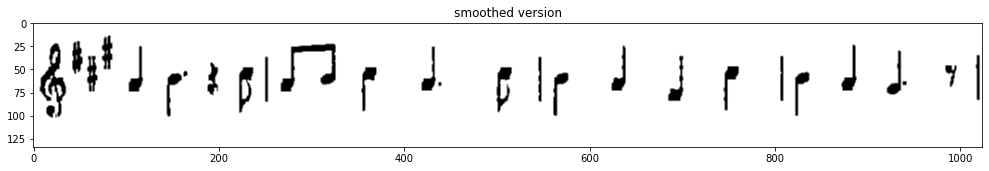

In [11]:
smooth = cv2.blur(raw_result, (2, 2))
plt.figure(figsize=[17,6])
plt.imshow(smooth, cmap='gray');plt.title("smoothed version");

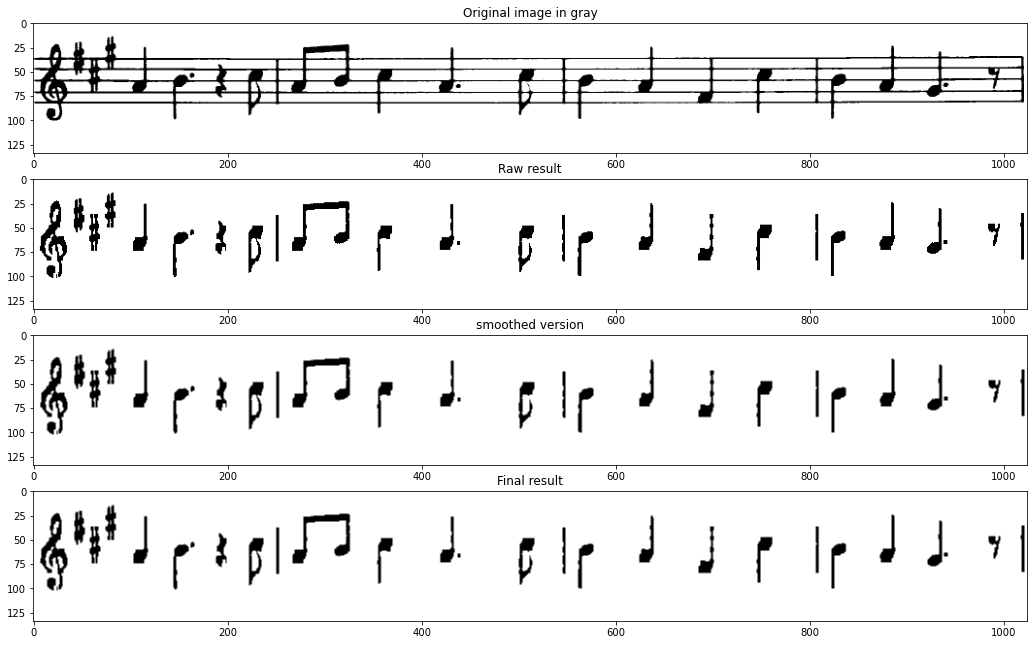

In [10]:
(rows, cols) = np.where(edges != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows, cols]
plt.figure(figsize=[18,11])
plt.subplot(411);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray");
plt.subplot(412);plt.imshow(raw_result, cmap='gray');plt.title("Raw result");
plt.subplot(413);plt.imshow(smooth, cmap='gray');plt.title("smoothed version");
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title("Final result");

https://docs.opencv.org/4.x/dd/dd7/tutorial_morph_lines_detection.html